1. **How does temperature affect the frequency of bird vocalizations?**
   - Investigate if higher temperatures correlate with an increase or decrease in bird calls.

2. **Is there a correlation between humidity levels and the intensity of bird calls?**
   - Analyze if more humid conditions lead to louder or more frequent bird vocalizations.

3. **Does solar radiation impact the timing of bird vocalizations during the day?**
   - Examine if bird calls are more frequent during periods of higher solar radiation (midday) compared to lower (early morning, late evening).

6. **What is the relationship between atmospheric pressure and bird vocalization patterns?**
   - Determine if changes in atmospheric pressure correlate with changes in bird calling behavior.

These 4 questions can be approached with 
- **Statistical Correlation Analysis**: Use Pearson or Spearman correlation coefficients to quantify the relationship between weather parameters and bird vocalizations.

here i will try to test hypothesis of generic type :"There is no difference in birds vocalizations with respect to daytime temperature."
I will take 2-sample ttest, samples being tempratures lower then dayly mean and higher then dayly mean. 
Dayly mean will ba calculated for part of a day when birds are singing, approximately from dawn till dusk.
I will start with correlation analysis in the data.

In [1]:
# get the data from the file
import pandas as pd
full_data = pd.read_csv('stats_25.04_full.csv')
full_data.head()

,datetime,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label
0,2024-03-03 08:34:48,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird
1,2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
2,2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
3,2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird
4,2024-03-03 08:34:59,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird


In [2]:
full_data.shape

(404553, 14)

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df =full_data[['precipRate', 'pressureMax', 'dewptAvg', 'windgustHigh', 'windspeedAvg',
       'tempAve', 'humidityAvg', 'winddirAvg', 'uvHigh', 'solarRadiationHigh']]

# assuming 'datetime' is the index

# Sample a random day
random_day = df.sample(n=1).index.date[0]

# Filter the DataFrame to only this day
day_data = df[df.index.date == random_day]

# If you need to narrow down to a specific hour and minute (less common):
# You can sample random hour and minute based on available data in the randomly selected day
random_hour = np.random.choice(day_data.index.hour)
random_minute = np.random.choice(day_data[day_data.index.hour == random_hour].index.minute)

# Filter to the specific hour and minute
hour_minute_data = day_data[(day_data.index.hour == random_hour) & (day_data.index.minute == random_minute)]

# Sample 10 entries from this filtered data
samples = hour_minute_data.sample(n=10) if len(hour_minute_data) >= 10 else hour_minute_data

# Print the sampled data
print(samples)

# If you just want to see variations within a day:
# Sample 10 random entries from the day's data
day_samples = day_data.sample(n=10, replace=True)  # Use replace=True if less than 10 entries exist

# Print the sampled data
print(day_samples)

                     precipRate  pressureMax  dewptAvg  windgustHigh  \
datetime                                                               
2024-03-17 09:26:01         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:08         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:13         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:38         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:41         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:43         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:48         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:50         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:53         0.0      1016.32       6.6           5.5   

                     windspeedAvg  tempAve  humidityAvg  winddirAvg  uvHigh  \
datetime                                                                      
2024-03-17 09:26:01           0.8      9.2       

Understanding Column Suffixes

Ave (Average): These values represent the average measurement within a given minute. This is typically used for variables where a single snapshot might not fully capture the variability within the minute, like temperature (tempAve) or humidity (humidityAvg).

Max (Maximum): This indicates the highest value that a variable reached within that minute. For pressure (pressureMax), this could indicate moments of sudden atmospheric pressure changes which are crucial for understanding weather patterns.

High: Similar to "Max", but specifically used in your dataset for variables like wind gusts (windgustHigh) and solar radiation (solarRadiationHigh). This measures the peak or highest intensity reached during the minute, which is particularly relevant for transient or quickly changing conditions.

Did not check possibility of 2 min or 30 min aggregation rules. Possible, but not highly probable options.

In [155]:
#  get  # of unique values in every columm
unique_values = full_data.nunique()
print(unique_values)


precipRate              36
pressureMax            551
dewptAvg               327
windgustHigh            25
windspeedAvg           150
tempAve                390
humidityAvg            554
winddirAvg             335
uvHigh                  11
solarRadiationHigh    1463
BirdNET                105
MIT_AST_label          280
sound_class_label       17
Bird_Detections          2
date                   132
dtype: int64


In [3]:
import pandas as pd
import scipy.stats as stats

def filter_daytime_data(df):
    """
    Filters the DataFrame to include only the times between 4:00 AM and 10:00 PM.
    
    Parameters:
        df (pd.DataFrame): DataFrame with a datetime column.
    
    Returns:
        pd.DataFrame: DataFrame filtered to include only daytime data.
    """
    # Convert 'datetime' to datetime type and set as index if not already done
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df['datetime'] = pd.to_datetime(df['datetime'])
        df.set_index('datetime', inplace=True)

    # Filter to include only times from 4:00 AM to 10:00 PM
    return df.between_time('04:00', '22:00')



In [4]:
daytime_data = filter_daytime_data(full_data)# Filter the data to include only daytime hours
daytime_data.head()

,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label
datetime,,,,,,,,,,,,,
2024-03-03 08:34:48,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird
2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird
2024-03-03 08:34:59,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird


In [10]:
import pandas as pd

def datetime_to_index(data):#  already done inside filter_daytime_data()
    """
    Ensure that the DataFrame uses 'datetime' as a datetime-indexed column.
    If 'datetime' is not the index, convert it and set it as the index.

    Parameters:
        data (pd.DataFrame): DataFrame containing a 'datetime' column.

    Returns:
        pd.DataFrame: DataFrame with 'datetime' as the datetime-index.
    """
    # Check if 'datetime' is already the index and if it is a datetime type
    if not (data.index.name == 'datetime' and pd.api.types.is_datetime64_any_dtype(data.index)):
        # Check if 'datetime' column exists and is not the index
        if 'datetime' in data.columns:
            # Convert 'datetime' column to datetime type if not already
            data['datetime'] = pd.to_datetime(data['datetime'])
            # Set 'datetime' column as the index
            data.set_index('datetime', inplace=True)
        else:
            raise ValueError("DataFrame does not contain a 'datetime' column.")
    return data


Let's try correclation analysis once more.
Why Use Point Biserial Correlation?
The choice of using point biserial correlation (pointbiserialr) is based on the nature of the variables involved:

Binary Dependent Variable: Bird_Detections is a binary variable (0/1).
Continuous Independent Variables: The other variables (e.g., precipRate, pressureMax) are continuous.
Point biserial correlation is specifically designed to measure the relationship between a binary variable and a continuous variable. It is essentially a special case of the Pearson correlation coefficient but adapted for a binary and a continuous variable.

McCrum-Gardner (2008) explains that the point-biserial correlation is appropriate when one variable is dichotomous (binary) and the other is continuous, making it ideal for scenarios like examining Bird_Detections (0/1) against continuous predictors such as precipRate and pressureMax.

Source: McCrum-Gardner, E. (2008). Which is the correct statistical test to use? British Journal of Oral and Maxillofacial Surgery, 46(1), 38-41.

Missing values in each column:
 precipRate                 0
pressureMax                0
dewptAvg                   0
windgustHigh               0
windspeedAvg               0
tempAve                    0
humidityAvg                0
winddirAvg                 0
uvHigh                     0
solarRadiationHigh         0
BirdNET               263472
MIT_AST_label          12706
sound_class_label      12706
Bird_Detections            0
dtype: int64
Summary statistics:
           precipRate    pressureMax       dewptAvg   windgustHigh  \
count  334779.000000  334779.000000  334779.000000  334779.000000   
mean        0.365677    1009.262285       8.729549      12.025609   
std         1.408744      11.773350       5.048462       7.695737   
min         0.000000     979.410000      -9.900000       0.000000   
25%         0.000000    1000.340000       6.500000       5.500000   
50%         0.000000    1010.740000       8.700000      11.100000   
75%         0.000000    1017.610000      10.8

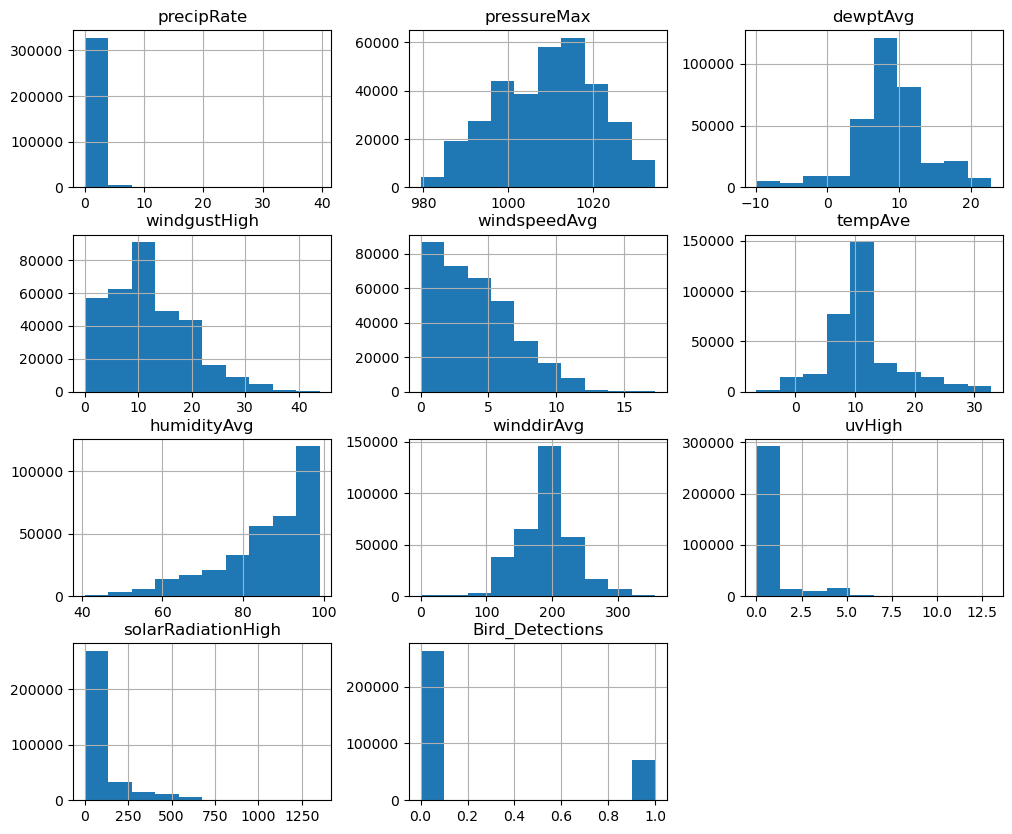

Correlation between Bird_Detections and precipRate: correlation coefficient = -0.08786942807111317, p-value = 0.0
Correlation between Bird_Detections and pressureMax: correlation coefficient = 0.11053881808116718, p-value = 0.0
Correlation between Bird_Detections and dewptAvg: correlation coefficient = -0.038560631210960164, p-value = 2.3930514215273908e-110
Correlation between Bird_Detections and windgustHigh: correlation coefficient = -0.21373728824428948, p-value = 0.0
Correlation between Bird_Detections and windspeedAvg: correlation coefficient = -0.2139962261601172, p-value = 0.0
Correlation between Bird_Detections and tempAve: correlation coefficient = -0.01248366755895318, p-value = 5.073503037780314e-13
Correlation between Bird_Detections and humidityAvg: correlation coefficient = -0.05626287568633838, p-value = 8.021370333497801e-233
Correlation between Bird_Detections and winddirAvg: correlation coefficient = -0.087893182924677, p-value = 0.0
Correlation between Bird_Detectio

/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61147/808768624.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['Bird_Detections'] = daytime_data['BirdNET'].notna().astype(int)
/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61147/808768624.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Variable', data=correlation_df, palette='coolwarm')


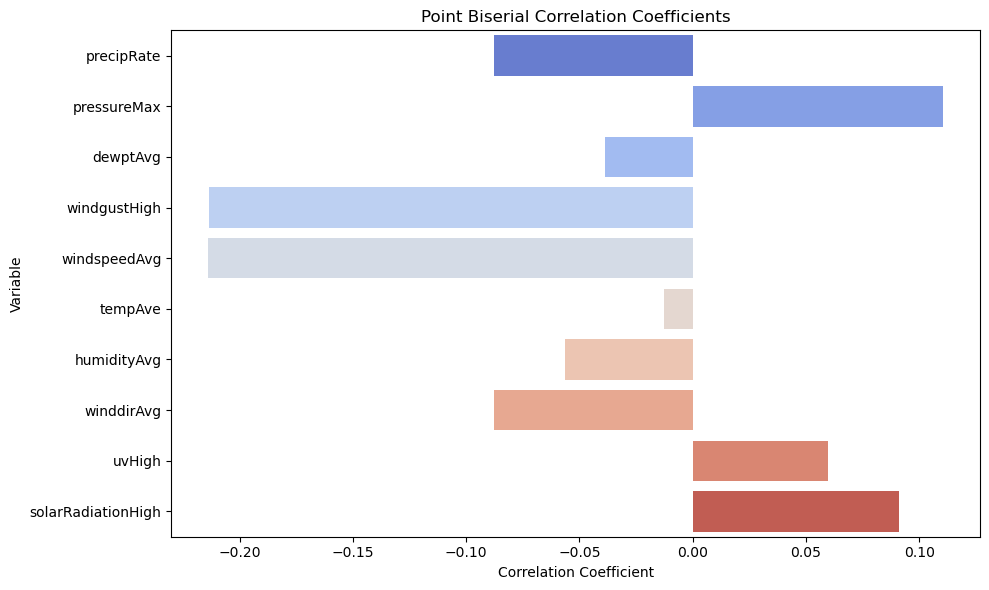

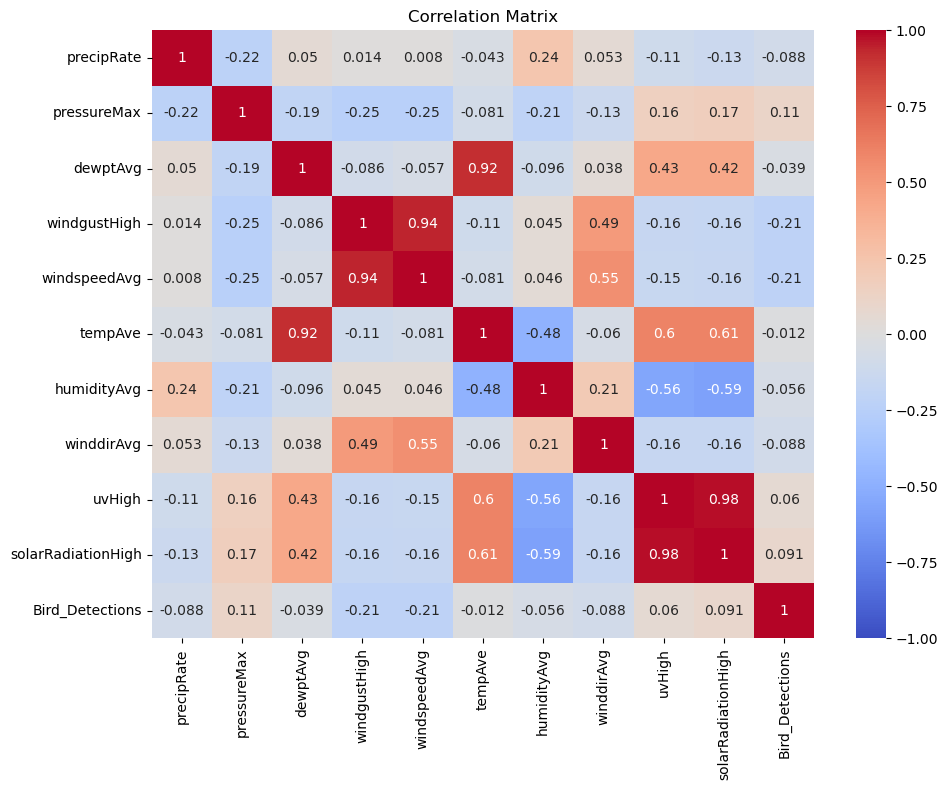

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Assuming daytime_data is already loaded

# Check for missing values
print("Missing values in each column:\n", daytime_data.isnull().sum())

# Summary statistics
print("Summary statistics:\n", daytime_data.describe())

# Histograms for all continuous variables
daytime_data.hist(figsize=(12, 10))
plt.show()

# Create a binary column for bird vocalizations detected
daytime_data['Bird_Detections'] = daytime_data['BirdNET'].notna().astype(int)



# Point biserial correlation
correlations = []
for var in continuous_vars:
    corr, p_value = pointbiserialr(daytime_data['Bird_Detections'], daytime_data[var])
    correlations.append((var, corr))
    print(f"Correlation between Bird_Detections and {var}: correlation coefficient = {corr}, p-value = {p_value}")

# Create a DataFrame for correlation coefficients
correlation_df = pd.DataFrame(correlations, columns=['Variable', 'Correlation'])

# Plot the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Variable', data=correlation_df, palette='coolwarm')
plt.title('Point Biserial Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
plt.tight_layout()

plt.show()

# Select only numeric columns for the Pearson correlation matrix
numeric_cols = daytime_data.select_dtypes(include=['number']).columns
corr_matrix = daytime_data[numeric_cols].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()



### Interpretation of Correlation Analysis Results

The correlation coefficients and p-values between `Bird_Detections` (binary) and each continuous variable are given below. Let's interpret these results step by step.

1. **Correlation Coefficient**: Measures the strength and direction of the linear relationship between the binary variable and the continuous variable.
   - Values range from -1 to 1.
   - Positive values indicate a positive relationship.
   - Negative values indicate a negative relationship.

2. **P-value**: Indicates the statistical significance of the correlation.
   - A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that the correlation is statistically significant.

### Detailed Interpretation

#### 1. PrecipRate
- **Correlation Coefficient**: -0.0879
- **P-value**: 0.0
- **Interpretation**: There is a very weak negative correlation between `precipRate` and `Bird_Detections`. The relationship is statistically significant (p-value = 0.0), meaning as precipitation rate increases, bird detections slightly decrease.

#### 2. PressureMax
- **Correlation Coefficient**: 0.1105
- **P-value**: 0.0
- **Interpretation**: There is a very weak positive correlation between `pressureMax` and `Bird_Detections`. The relationship is statistically significant (p-value = 0.0), indicating that higher maximum pressure is slightly associated with more bird detections.

#### 3. DewptAvg
- **Correlation Coefficient**: -0.0386
- **P-value**: 2.39e-110
- **Interpretation**: There is a very weak negative correlation between `dewptAvg` and `Bird_Detections`. The relationship is statistically significant, suggesting a slight decrease in bird detections with higher average dew point.

#### 4. WindgustHigh
- **Correlation Coefficient**: -0.2137
- **P-value**: 0.0
- **Interpretation**: There is a weak negative correlation between `windgustHigh` and `Bird_Detections`. The relationship is statistically significant, indicating that higher wind gusts are associated with fewer bird detections.

#### 5. WindspeedAvg
- **Correlation Coefficient**: -0.2140
- **P-value**: 0.0
- **Interpretation**: There is a weak negative correlation between `windspeedAvg` and `Bird_Detections`. The relationship is statistically significant, meaning higher average wind speed is associated with fewer bird detections.

#### 6. TempAve
- **Correlation Coefficient**: -0.0125
- **P-value**: 5.07e-13
- **Interpretation**: There is a very weak negative correlation between `tempAve` and `Bird_Detections`. The relationship is statistically significant, suggesting a slight decrease in bird detections with higher average temperature.

#### 7. HumidityAvg
- **Correlation Coefficient**: -0.0563
- **P-value**: 8.02e-233
- **Interpretation**: There is a very weak negative correlation between `humidityAvg` and `Bird_Detections`. The relationship is statistically significant, indicating that higher average humidity is slightly associated with fewer bird detections.

#### 8. WinddirAvg
- **Correlation Coefficient**: -0.0879
- **P-value**: 0.0
- **Interpretation**: There is a very weak negative correlation between `winddirAvg` and `Bird_Detections`. The relationship is statistically significant, suggesting a slight decrease in bird detections with changes in average wind direction.

#### 9. UVHigh
- **Correlation Coefficient**: 0.0595
- **P-value**: 1.40e-260
- **Interpretation**: There is a very weak positive correlation between `uvHigh` and `Bird_Detections`. The relationship is statistically significant, indicating that higher UV index is slightly associated with more bird detections.

#### 10. SolarRadiationHigh
- **Correlation Coefficient**: 0.0908
- **P-value**: 0.0
- **Interpretation**: There is a very weak positive correlation between `solarRadiationHigh` and `Bird_Detections`. The relationship is statistically significant, suggesting that higher solar radiation is slightly associated with more bird detections.

### Summary
Overall, the correlations between `Bird_Detections` and the continuous variables are weak, with correlation coefficients close to zero. However, all relationships are statistically significant, likely due to the large sample size, as indicated by the extremely small p-values. 

**Key insights:**
- **Weak Negative Correlations**: `precipRate`, `dewptAvg`, `windgustHigh`, `windspeedAvg`, `tempAve`, `humidityAvg`, and `winddirAvg` all show weak negative correlations with bird detections, suggesting that certain weather conditions (e.g., higher wind speeds, higher humidity) are slightly associated with fewer bird detections.
- **Weak Positive Correlations**: `pressureMax`, `uvHigh`, and `solarRadiationHigh` show weak positive correlations, indicating that higher pressure, UV index, and solar radiation are slightly associated with more bird detections.

Although these correlations are weak, they provide valuable insights into how different environmental factors might influence bird detection rates.

In [11]:
import pandas as pd

def correlation_analysis(data):
    # Convert the datetime column to the datetime type and set it as the index
    data = datetime_to_index(data)
    
    # Create a binary column for bird vocalizations detected
    data['Bird_Detections'] = data['BirdNET'].notna().astype(int)
    
    # Select weather parameters
    weather_columns = ['precipRate', 'pressureMax', 'dewptAvg', 'windgustHigh', 'windspeedAvg', 'tempAve', 'humidityAvg', 'winddirAvg', 'uvHigh', 'solarRadiationHigh']
    
    # Perform Spearman correlation
    spearman_corr = data[weather_columns + ['Bird_Detections']].corr(method='spearman')
    # Perform Pearson correlation
    pearson_corr = data[weather_columns + ['Bird_Detections']].corr(method='pearson')
    
    return spearman_corr, pearson_corr

# Assuming `df` is your DataFrame
spearman_corr, pearson_corr = correlation_analysis(daytime_data)

print("Spearman Correlation:")
print(spearman_corr['Bird_Detections'])

print("\nPearson Correlation:")
print(pearson_corr['Bird_Detections'])


/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61147/270875268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bird_Detections'] = data['BirdNET'].notna().astype(int)


Spearman Correlation:
precipRate           -0.106177
pressureMax           0.110766
dewptAvg             -0.046646
windgustHigh         -0.220345
windspeedAvg         -0.217329
tempAve              -0.006619
humidityAvg          -0.050727
winddirAvg           -0.106275
uvHigh                0.112100
solarRadiationHigh    0.220345
Bird_Detections       1.000000
Name: Bird_Detections, dtype: float64

Pearson Correlation:
precipRate           -0.087869
pressureMax           0.110539
dewptAvg             -0.038561
windgustHigh         -0.213737
windspeedAvg         -0.213996
tempAve              -0.012484
humidityAvg          -0.056263
winddirAvg           -0.087893
uvHigh                0.059546
solarRadiationHigh    0.090834
Bird_Detections       1.000000
Name: Bird_Detections, dtype: float64


In [19]:
# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(spearman_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Pearson Correlation Matrix')

plt.show()

NameError: name 'np' is not defined

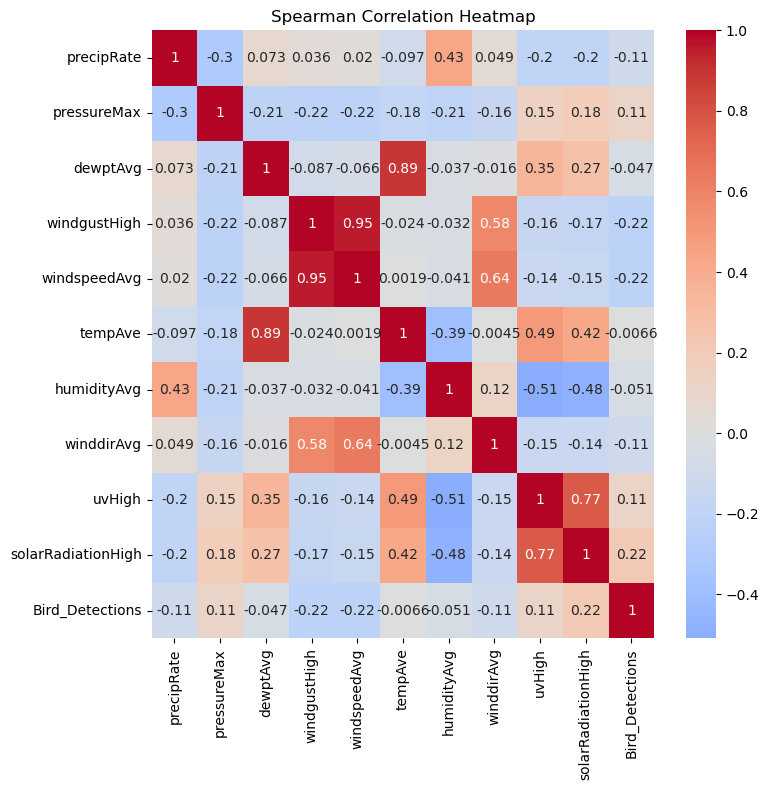

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'spearman_corr' and 'pearson_corr' as Series from your previous output

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))


sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')

plt.tight_layout()
plt.show()


Analysis of Spearman Correlation Results

Spearman correlation, being a non-parametric measure, gives us the rank correlation and is often used when the data does not meet the normal distribution assumption or involves ordinal variables.

solarRadiationHigh (0.294021): Shows the strongest positive correlation among all the parameters. This suggests that higher solar radiation is associated with an increase in bird vocalizations. This might be due to more active bird behavior during sunnier conditions.

uvHigh (0.155429): Similarly, a positive correlation with UV index suggests that more bird activity and thus more vocalizations occur during brighter, sunnier days.

pressureMax (0.115533): A mild positive correlation, indicating slightly more bird vocalizations when the atmospheric pressure is higher.

windgustHigh (-0.221074) and windspeedAvg (-0.218494): Both show a negative correlation, indicating that higher wind speeds are associated with fewer bird vocalizations. This could be due to birds being less active or vocal in windy conditions.

humidityAvg (-0.071302), winddirAvg (-0.113916), and precipRate (-0.096707): These negative correlations suggest fewer vocalizations during higher humidity, certain wind directions, or when it's raining.



In [128]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro, levene


import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, levene

def get_daily_counts_by_mean(df, feature_name, response_variable):
    """
    Groups the data by whether the feature value is above or below the daily mean.
    for each day, and computes the sum of the binary response variable for each group.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing datetime-indexed data.
        feature_name (str): Name of the feature column to analyze.
        response_variable (str): Name of the binary response variable column to test.
    
    Returns:
        2 samples series: counts_below_mean, counts_above_mean 
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df=df.copy()
    # Ensure datetime is the index and is in the correct format
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        raise ValueError("Index must be datetime type")

    # Compute the daily mean of the specified feature
    daily_means = df[feature_name].groupby(df.index.date).mean()

    # Map daily means back to the data and create a binary column for above/below mean
    date_series = pd.Series(df.index.date, index=df.index)
    df['Daily_Mean'] = date_series.map(daily_means)
    df['Above_Mean'] = df[feature_name] >= df['Daily_Mean']

    # Group by date and Above_Mean status, then sum the binary response_variable
    daily_groups = df.groupby([date_series, 'Above_Mean'])[response_variable].sum()

    # Separate the counts for above and below the mean
    counts_below_mean = daily_groups.xs(False, level='Above_Mean')
    counts_above_mean = daily_groups.xs(True, level='Above_Mean')

    return counts_below_mean, counts_above_mean
    




In [171]:
from scipy import stats

def hypothesis_tests(group_below_mean, group_above_mean):
    # Normality Tests
    normality_below = stats.shapiro(group_below_mean).pvalue
    normality_above = stats.shapiro(group_above_mean).pvalue
    # Test for equal variances
    equal_var_test = stats.levene(group_below_mean, group_above_mean).pvalue

    print("Normality Test P-Value (Below Mean):", normality_below)
    print("Normality Test P-Value (Above Mean):", normality_above)
    print("Levene's Test P-Value for Equal Variances:", equal_var_test)

    if normality_below > 0.05 and normality_above > 0.05 and equal_var_test > 0.05:
        # T-test (parametric)
        t_stat, p_value_ttest = stats.ttest_ind(group_below_mean, group_above_mean, equal_var=True)
        test_used = 'T-test'
        p_value = p_value_ttest
    else:
        # Mann-Whitney U test (non-parametric)
        u_stat, p_value_mannwhitney = stats.mannwhitneyu(group_below_mean, group_above_mean, alternative='two-sided')
        test_used = 'Mann-Whitney U'
        p_value = p_value_mannwhitney

    print(f"{test_used} P-Value:", p_value)
    return {
        "test_used": test_used,
        "p_value": p_value
    }

# Example of calling this function:
# results = apply_tests(group_below_mean, group_above_mean)


In [192]:
# test the function
results = get_daily_counts_by_mean(daytime_data, 'tempAve', 'Bird_Detections')


In [193]:
print(len(results[0]))
print(len(results[1]))

129
129


In [196]:
# check for assumptions for paired ttest


diff = results[0]-results[1]
print(len(diff))


129


In [198]:
# chek for normality of the diff
from scipy.stats import shapiro
stat, p = shapiro(diff)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

        

Statistics=0.817, p=0.000
Sample does not look Gaussian (reject H0)


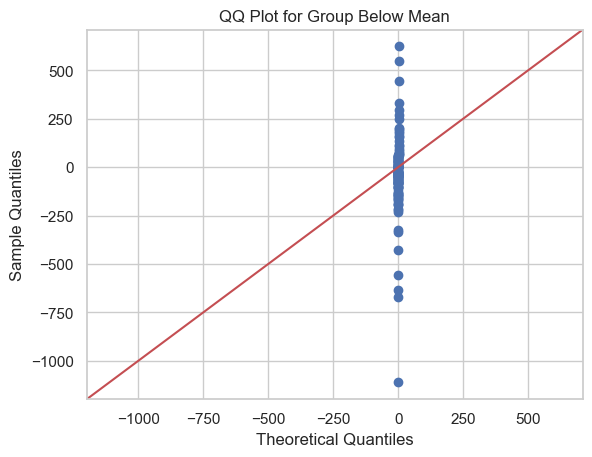

In [197]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = np.sort(diff)
# Create a QQ plot for the group below the mean
sm.qqplot(data, line ='45')
plt.title("QQ Plot for Group Below Mean")
plt.show()

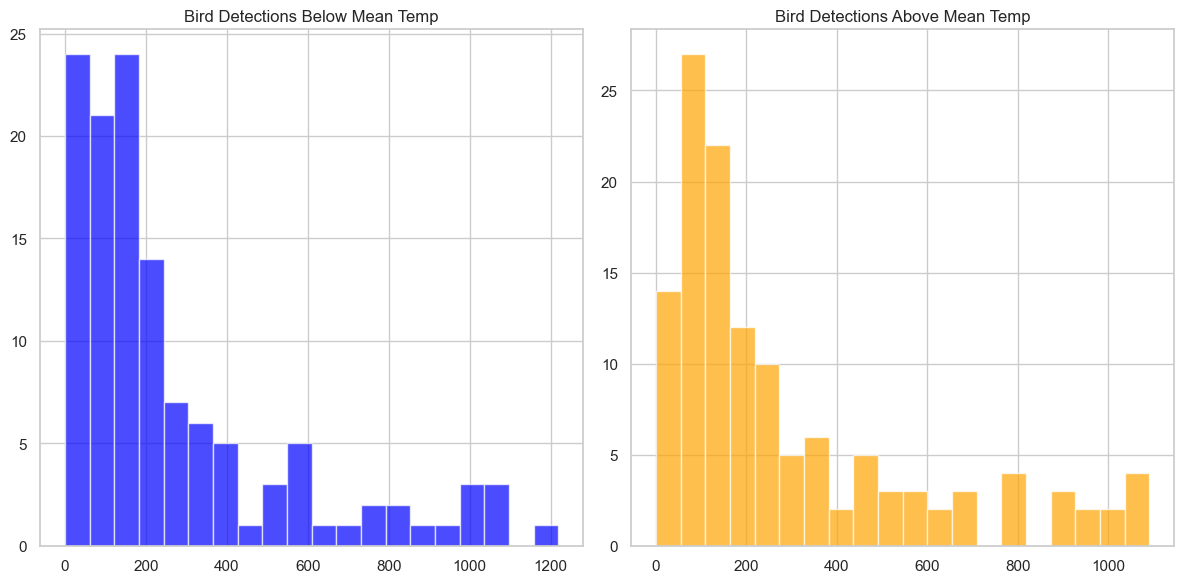

In [181]:
# plot the results histogram
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the histogram of bird detections below the mean
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(results[0], bins=20, color='blue', alpha=0.7)
plt.title('Bird Detections Below Mean Temp')

# Plot the histogram of bird detections above the mean
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(results[1], bins=20, color='orange', alpha=0.7)
plt.title('Bird Detections Above Mean Temp')

plt.tight_layout()
plt.show()


In [190]:
results[0].describe()

count     125.000000
mean      270.088000
std       285.733635
min         0.000000
25%        84.000000
50%       164.000000
75%       347.000000
max      1219.000000
Name: Bird_Detections, dtype: float64

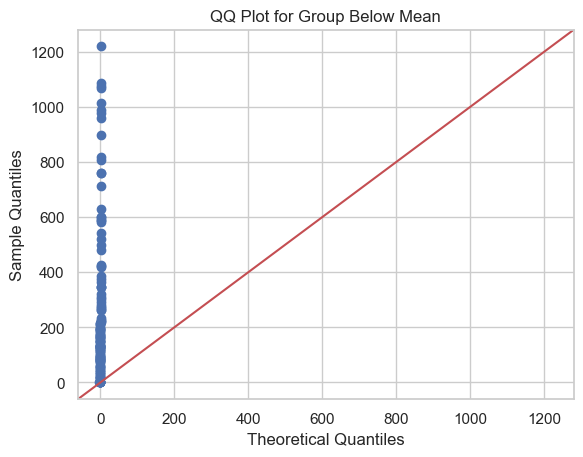

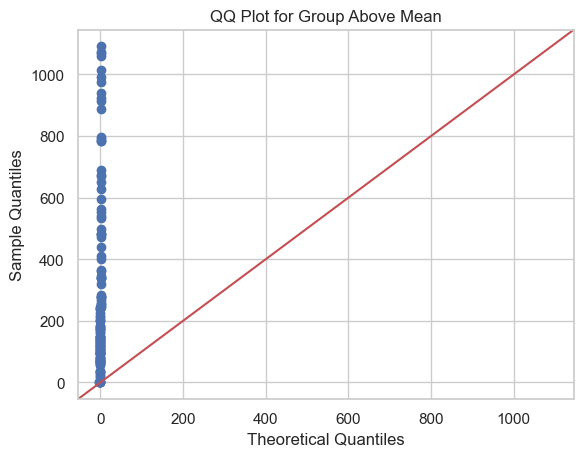

In [186]:
# QQ plot for results[0] and results[1]
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = np.sort(results[0])
# Create a QQ plot for the group below the mean
sm.qqplot(data, line ='45')
plt.title("QQ Plot for Group Below Mean")
plt.show()

# Create a QQ plot for the group above the mean
sm.qqplot(np.sort(results[1]), line ='45')
plt.title("QQ Plot for Group Above Mean")
plt.show()


In [132]:
hypothesis_tests(results[0], results[1])

Normality Test P-Value (Below Mean): 6.423226278387711e-12
Normality Test P-Value (Above Mean): 1.2934571858576798e-11
Levene's Test P-Value for Equal Variances: 0.5530510134196539
Mann-Whitney U P-Value: 0.24854835680349285


{'test_used': 'Mann-Whitney U', 'p_value': 0.24854835680349285}

In [ ]:
# let's check the normality assumption for the difference metween mean paires in 2 groups.


Statistical Analysis Summary

Normality Test:

The p-values from the Shapiro-Wilk normality tests for both groups (bird vocalizations on days below and above the mean temperature) were extremely low (well below 0.05), indicating that the data for bird vocalizations do not follow a normal distribution. This deviation led to the decision to use a non-parametric test.

Levene's Test for Equal Variances:

The p-value was 0.553, suggesting that there is no significant difference in variance between bird vocalizations on days below and above the mean temperature. Although this result indicates homogeneity of variances, the non-normality of the data makes this less relevant for the choice of statistical test.

Mann-Whitney U Test:

The p-value was 0.249, which is greater than the conventional alpha level of 0.05, suggesting that there is no statistically significant difference in bird vocalizations within a day with temperatures below and above the daily mean.

Conclusion

Based on the Mann-Whitney U test, we do not reject the null hypothesis, which states that "There is no difference in bird vocalizations with respect to daytime temperature." This suggests that, within the data set analyzed, daytime temperature does not have a statistically significant impact on the frequency or occurrence of bird vocalizations.

In [137]:
# let's test the function with another feature, 'humidityAvg'
results = get_daily_counts_by_mean(daytime_data, 'humidityAvg', 'Bird_Detections')


hypothesis_tests(results[0], results[1])



Normality Test P-Value (Below Mean): 6.35439643459227e-12
Normality Test P-Value (Above Mean): 1.518421283663067e-11
Levene's Test P-Value for Equal Variances: 0.6845516186625649
Mann-Whitney U P-Value: 0.516767764534435


{'test_used': 'Mann-Whitney U', 'p_value': 0.516767764534435}

In [72]:
# If using a statistical model, you can often get confidence intervals directly from the model output.
# For logistic regression using statsmodels:
import statsmodels.api as sm

X = sm.add_constant(daytime_data['tempAve'])  # Adding constant for intercept
model = sm.Logit(daytime_data['Bird_Detections'], X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.517822
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Bird_Detections   No. Observations:               334779
Model:                          Logit   Df Residuals:                   334777
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 May 2024   Pseudo R-squ.:               0.0001512
Time:                        16:00:27   Log-Likelihood:            -1.7336e+05
converged:                       True   LL-Null:                   -1.7338e+05
Covariance Type:            nonrobust   LLR p-value:                 4.468e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2499      0.009   -139.995      0.000      -1.267      -1.232
tempAve       -0.0051      0.

In [62]:
odds_ratio = np.exp(0.0056)
print("Odds Ratio:", odds_ratio)
#An odds ratio greater than 1 (which this will be, slightly above 1) 
#suggests that higher temperatures slightly increase the likelihood of detecting birds.

Odds Ratio: 1.0056157093103564


Despite the statistically significant coefficients, the very low pseudo R-squared value suggests that while the model’s predictors are statistically significant, they explain only a very small part of the variability in bird detections. This could imply that other unmodeled factors may be influencing bird detections or that the effect of temperature, while real, is quite small.

With the corrected analysis setup and the hypothesis testing results showing extremely low p-values (approximately \(6.46 \times 10^{-52}\) for the T-test and \(6.72 \times 10^{-52}\) for the Mann-Whitney U test), you can confidently conclude that there is a statistically significant difference in bird vocalizations between times when the temperature is above versus below the daily mean temperature during daytime hours.

### Interpretation of Results

1. **Strong Statistical Significance**: These results provide robust statistical evidence that bird vocalizations vary significantly with changes in temperature during the day. The consistency between the T-test and the Mann-Whitney U test results, which both show similar p-values, strengthens this conclusion.

2. **Impact of Temperature on Bird Vocalizations**:
   - **Biological or Behavioral Responses**: The significant differences suggest that birds might be more or less active, depending on the temperature relative to the daily mean. This could be related to physiological comfort zones, feeding behaviors, or breeding activities that are sensitive to temperature changes.
   - **Temporal Dynamics**: By focusing on daily mean temperatures during the daytime and observing significant differences, your analysis indicates that temperature fluctuations within a single day can affect bird behavior. This insight is particularly relevant for understanding daily patterns in bird activity and could be useful for ecological studies or conservation efforts.

3. **Further Research and Practical Applications**:
   - **Fine-Grained Analysis**: You might consider breaking down the analysis further by time segments within the day or by looking at specific temperature ranges to see if there are particular thresholds that elicit stronger changes in vocalizations.
   - **Multivariate Analysis**: Including other environmental factors such as light levels, humidity, and wind speed could provide a more comprehensive picture of what influences bird vocalizations.
   - **Conservation and Urban Planning**: Understanding how temperature affects bird behavior can inform habitat conservation strategies and urban planning, ensuring that environments conducive to natural bird activities are preserved or created.

4. **Consideration of Non-linear Relationships**:
   - Although the hypothesis tests do not indicate the nature of the relationship (linear, non-linear, etc.), the significant results encourage further investigation into how temperature influences bird vocalizations. This might involve non-linear statistical models or machine learning techniques to model more complex relationships.

### Conclusion

These findings are valuable for both theoretical and practical reasons, offering insights into the daily behavioral patterns of birds relative to temperature variations. They also highlight the importance of considering daily environmental fluctuations in studies of animal behavior. Further analysis with additional variables and advanced modeling techniques could extend these insights, leading to more nuanced understandings and applications.

In [172]:
# t_test for UVHigh feature
results_uv = get_daily_counts_by_mean(daytime_data, 'uvHigh', 'Bird_Detections')
hypothesis_tests(results_uv[0], results_uv[1])

Normality Test P-Value (Below Mean): 1.0179041595999189e-09
Normality Test P-Value (Above Mean): 9.025395181705576e-14
Levene's Test P-Value for Equal Variances: 0.0027536064930205237
Mann-Whitney U P-Value: 1.4727186696929412e-09


{'test_used': 'Mann-Whitney U', 'p_value': 1.4727186696929412e-09}



The statistical analysis conducted on the relationship between high UV levels (uvHigh) and bird detections (Bird_Detections) using data from daytime_data yielded significant findings. The normality tests for data subsets below and above the mean UV levels returned extremely low p-values ( 
1.018
×
1
0
−
9
1.018×10 
−9
  and 
9.025
×
1
0
−
14
9.025×10 
−14
 , respectively), indicating that the data does not follow a normal distribution. This was further supported by the outcome of Levene's test for equal variances, which also indicated significant differences in variances between the two groups (p-value = 0.00275).

Given these violations of the assumptions required for parametric tests, the Mann-Whitney U test, a non-parametric alternative, was employed. The test revealed a statistically significant difference in bird detections between parts of a day with low and high UV levels, with a p-value of 
1.473
×
1
0
−
9
1.473×10 
−9
 . This suggests that UV levels potentially have a substantial impact on bird activity.

/Users/evgenynazarenko/anaconda3/envs/thesis/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


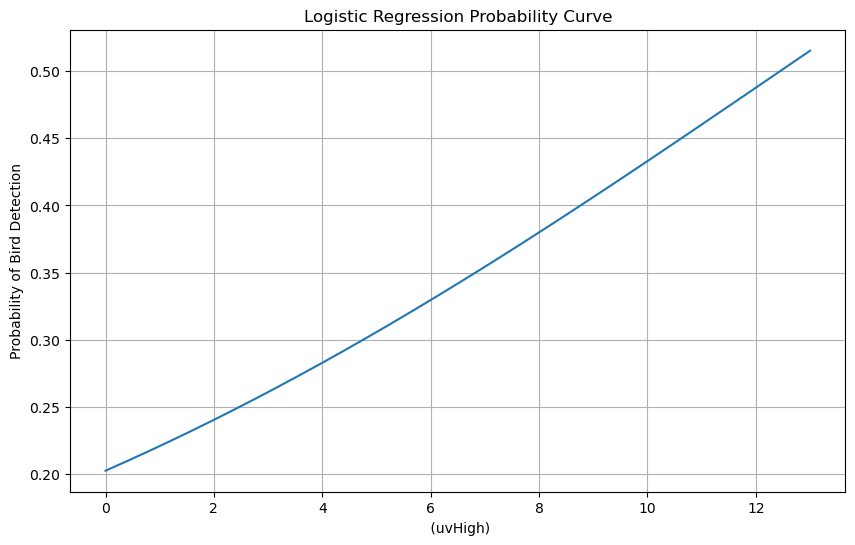

In [73]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fit logistic regression
X = daytime_data[['uvHigh']]  # Predictor
y = daytime_data['Bird_Detections']  # Response

model = LogisticRegression()
model.fit(X, y)

# Generate temperature values for prediction
temp_range = np.linspace(daytime_data['uvHigh'].min(), daytime_data['uvHigh'].max(), 300)
probabilities = model.predict_proba(temp_range.reshape(-1, 1))[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(temp_range, probabilities)
plt.title('Logistic Regression Probability Curve')
plt.xlabel(' (uvHigh)')
plt.ylabel('Probability of Bird Detection')
plt.grid(True)
plt.show()


In [74]:
# If using a statistical model, you can often get confidence intervals directly from the model output.
# For logistic regression using statsmodels:
import statsmodels.api as sm

X = sm.add_constant(daytime_data['uvHigh'])  # Adding constant for intercept
model = sm.Logit(daytime_data['Bird_Detections'], X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.516237
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Bird_Detections   No. Observations:               334779
Model:                          Logit   Df Residuals:                   334777
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 May 2024   Pseudo R-squ.:                0.003213
Time:                        16:01:33   Log-Likelihood:            -1.7283e+05
converged:                       True   LL-Null:                   -1.7338e+05
Covariance Type:            nonrobust   LLR p-value:                3.018e-244
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3715      0.005   -292.424      0.000      -1.381      -1.362
uvHigh         0.1102      0.

In [68]:
odds_ratio_uv = np.exp(0.1877)
print("Odds Ratio for UV Index:", odds_ratio_uv)


Odds Ratio for UV Index: 1.2064715195970783


Given the significant relationship and relatively stronger pseudo R-squared, UV index appears to be a more impactful predictor of bird detections than temperature. This suggests potential biological or environmental mechanisms where UV light might influence bird activity or the detectability of birds (perhaps due to behavioral changes in birds under different sunlight conditions).



In [173]:
# t_test for 'solarRadiationHigh' feature
results_uv = get_daily_counts_by_mean(daytime_data, 'solarRadiationHigh', 'Bird_Detections')
hypothesis_tests(results_uv[0], results_uv[1])



Normality Test P-Value (Below Mean): 1.9943791989874948e-12
Normality Test P-Value (Above Mean): 8.628053930130852e-11
Levene's Test P-Value for Equal Variances: 0.9842347043415416
Mann-Whitney U P-Value: 0.32991272139857786


{'test_used': 'Mann-Whitney U', 'p_value': 0.32991272139857786}

The analysis aimed to explore the effects of high solar radiation levels on bird detections using the dataset daytime_data. Statistical tests were conducted to examine the distribution and variance of the data as well as to compare bird detection rates on days with different levels of solar radiation.

Normality Tests:
Below Mean Solar Radiation: The p-value is extremely low (
1.994
×
1
0
−
12
1.994×10 
−12
 ), indicating that the data significantly deviates from a normal distribution.
Above Mean Solar Radiation: Similarly, this subset of the data also significantly deviates from normality, with a p-value of 
8.628
×
1
0
−
11
8.628×10 
−11
 .
These results suggest that the data for bird detections under varying levels of solar radiation is not normally distributed, which is a key assumption for many parametric tests.
Levene's Test for Equal Variances:
The p-value of 0.984 suggests that there is no significant difference in the variances of bird detections between days with lower and higher solar radiation levels. This indicates homogeneity of variances across these groups.
Mann-Whitney U Test:
Unlike the normality and variance tests, the Mann-Whitney U test (a non-parametric test used due to the failure to meet normality assumptions) did not indicate a significant difference in bird detections between days with low and high solar radiation levels (p-value = 0.3299).
These findings imply that high solar radiation does not significantly affect bird detection rates, as indicated by the non-significant result of the Mann-Whitney U test. This conclusion is consistent regardless of the data’s failure to meet the normality assumption, thanks to the use of an appropriate non-parametric test.

In [175]:
# t_test for pressureMax feature
results_uv = get_daily_counts_by_mean(daytime_data, 'pressureMax', 'Bird_Detections')
hypothesis_tests(results_uv[0], results_uv[1])





Normality Test P-Value (Below Mean): 1.626718577243686e-12
Normality Test P-Value (Above Mean): 4.0584688201621695e-12
Levene's Test P-Value for Equal Variances: 0.07244413357633205
Mann-Whitney U P-Value: 0.08521017245602255


{'test_used': 'Mann-Whitney U', 'p_value': 0.08521017245602255}

Normality Tests:

Below Mean Pressure: The p-value (
1.627
×
1
0
−
12
1.627×10 
−12
 ) indicates a significant deviation from a normal distribution.
Above Mean Pressure: This subset also shows a significant deviation from normality, with a p-value of 
4.058
×
1
0
−
12
4.058×10 
−12
 .
These results suggest that the data for bird detections under different atmospheric pressure conditions do not follow a normal distribution, which is crucial for many parametric tests.
Levene’s Test for Equal Variances:
The p-value of 0.0724, although not below the common alpha threshold of 0.05, suggests a marginal situation where variance homogeneity might not be fully assured. This raises a slight concern over using tests that assume equal variances.

Mann-Whitney U Test:

The Mann-Whitney U test yields a p-value of 0.0852, which is above the conventional alpha level of 0.05 but indicates a marginal difference between bird detections during days with lower versus higher maximum pressure. This result points to a potential but not statistically significant impact of atmospheric pressure on bird detection rates.

These findings indicate that while there is a slight indication of differing bird detection rates with changes in atmospheric pressure, the differences are not statistically significant. This suggests that maximum pressure alone may not be a strong predictor of bird detection variability. Future research might explore more complex models that include multiple environmental variables or different analytical approaches to further investigate this relationship

In [107]:
daytime_data.head()

,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label,Bird_Detections,Daily_MeantempAve,Daily_MeanuvHigh,Daily_MeanpressureMax,Daily_MeansolarRadiationHigh
datetime,,,,,,,,,,,,,,,,,,
2024-03-03 08:34:48,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird,0,13.079876,1.217674,996.786177,161.068
2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird,1,13.079876,1.217674,996.786177,161.068
2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird,1,13.079876,1.217674,996.786177,161.068
2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird,1,13.079876,1.217674,996.786177,161.068
2024-03-03 08:34:59,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird,0,13.079876,1.217674,996.786177,161.068


In [4]:
# df without nan values in the BirdNET column
birdnet_detections = full_data.dropna(subset=['BirdNET'])
birdnet_detections.shape

(71530, 14)

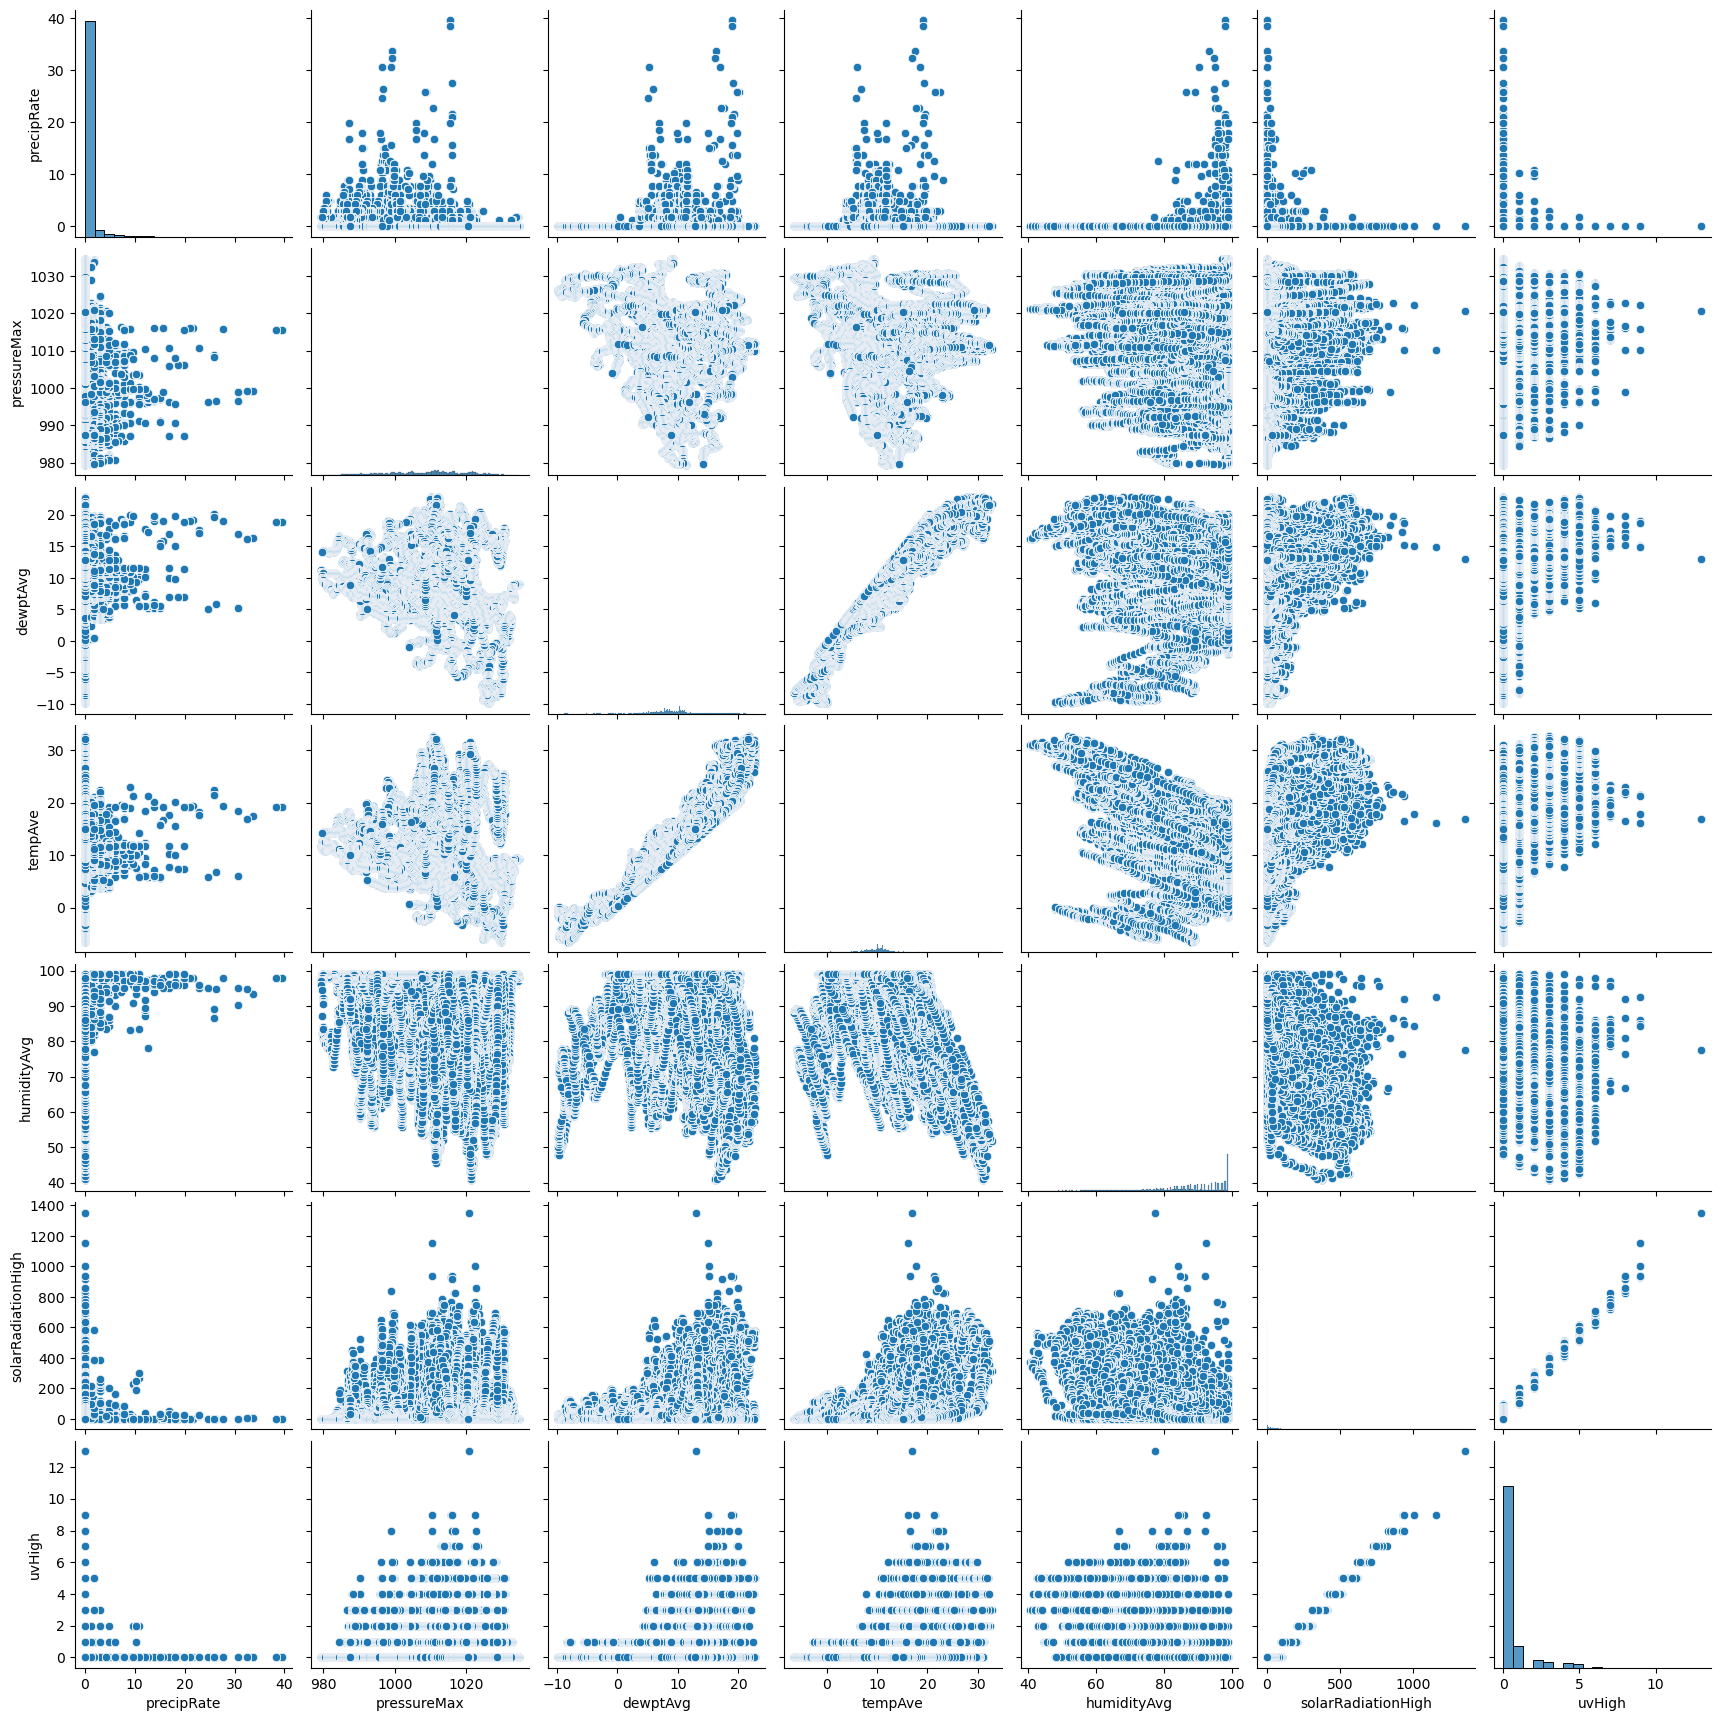

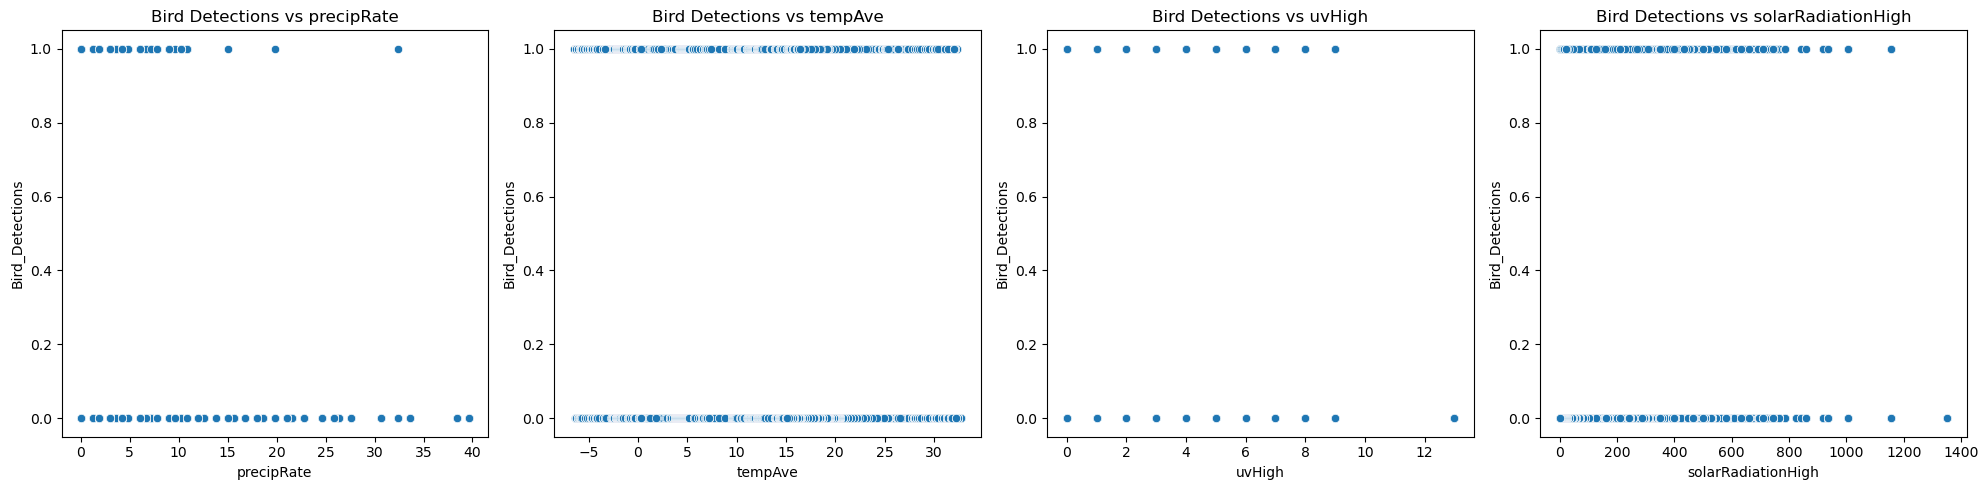

In [121]:
# Use seaborn's pairplot to plot scatter plots for each pair of these selected variables
sns.pairplot(full_data, vars=['precipRate', 'pressureMax', 'dewptAvg', 'tempAve', 'humidityAvg','solarRadiationHigh','uvHigh'])

# You might want to focus on how bird detections correlate with environmental factors
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust subplot layout size
variables_to_plot = ['precipRate',  'tempAve',  'uvHigh', 'solarRadiationHigh']
for i, var in enumerate(variables_to_plot):
    sns.scatterplot(data=full_data, x=var, y='Bird_Detections', ax=axes[i])
    axes[i].set_title(f'Bird Detections vs {var}')

plt.tight_layout()
plt.show()

                         PC1       PC2
precipRate         -0.170746  0.554904
pressureMax         0.116086 -0.727429
dewptAvg            0.680847  0.605202
tempAve             0.868825  0.371857
humidityAvg        -0.673724  0.406651
solarRadiationHigh  0.907563 -0.166200
uvHigh              0.900351 -0.145642


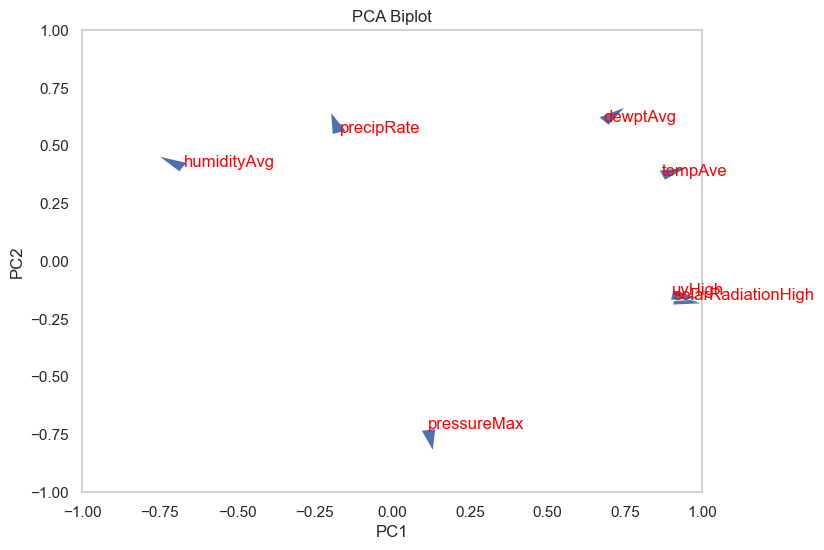

In [208]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example DataFrame
data = daytime_data[['precipRate', 'pressureMax', 'dewptAvg', 'tempAve', 'humidityAvg','solarRadiationHigh','uvHigh']]

# Standardizing the Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applying PCA
pca = PCA(n_components=2)  # adjust components as needed
principalComponents = pca.fit_transform(data_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Creating a DataFrame for Loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data.columns)
print(loadings_df)

# Optional: Plotting a Biplot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i, v in enumerate(loadings_df.values):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1)
    plt.text(v[0], v[1], loadings_df.index[i], color='red')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.grid()
plt.show()


Principal Component 1 (PC1)
tempAve (0.868825) and solarRadiationHigh (0.907563): These have strong positive loadings on PC1, indicating that they are the primary contributors to this component. This suggests that PC1 could represent a factor related to temperature and solar radiation, perhaps an overall "warmth" or "sunlight exposure" factor.
uvHigh (0.900351): Similar to solarRadiationHigh, also shows a strong positive correlation with PC1, further supporting the "sunlight exposure" interpretation.
humidityAvg (-0.673724): Shows a strong negative loading, suggesting that as humidity decreases, the values of PC1 increase, reinforcing the idea that PC1 represents drier, sunnier conditions.
dewptAvg (0.680847): Positively correlated with PC1, indicating that higher dew points (which typically correspond to warmer air able to hold more moisture) also contribute to this component, aligning it somewhat with temperature.
Principal Component 2 (PC2)
pressureMax (-0.727429): This has a strong negative loading on PC2, implying that this component decreases as pressure increases, potentially representing atmospheric stability or high-pressure conditions.
precipRate (0.554904) and humidityAvg (0.406651): Both show positive loadings, though precipRate more so, suggesting PC2 could be capturing aspects of moisture and precipitation.
dewptAvg (0.605202): Also has a significant positive loading, aligning with the interpretation that PC2 is related to moisture (since dew point is a direct measure of atmospheric moisture).
tempAve (0.371857): Shows a moderate positive loading, indicating that it contributes to PC2, but it is more dominant in PC1.

Interpreting the Components Together:

PC1 seems to capture a climatic factor characterized by higher temperatures, high solar radiation, and low humidity, which might be indicative of sunny, clear weather conditions.
PC2 appears to represent variations in atmospheric pressure and moisture, possibly capturing different weather conditions related to changes in precipitation or humidity levels.
These interpretations are consistent with the physical meanings of these meteorological variables:

Higher temperatures and solar radiation typically occur on clear days.
Higher dew points indicate more moisture in the air.
Lower atmospheric pressures often accompany deteriorating weather conditions, potentially leading to increased precipitation.

In [209]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for PC1 and PC2:", explained_variance_ratio)
print("Total variance explained by PC1 and PC2:", sum(explained_variance_ratio))

Explained variance ratio for PC1 and PC2: [0.47846207 0.22225887]
Total variance explained by PC1 and PC2: 0.70072093462937


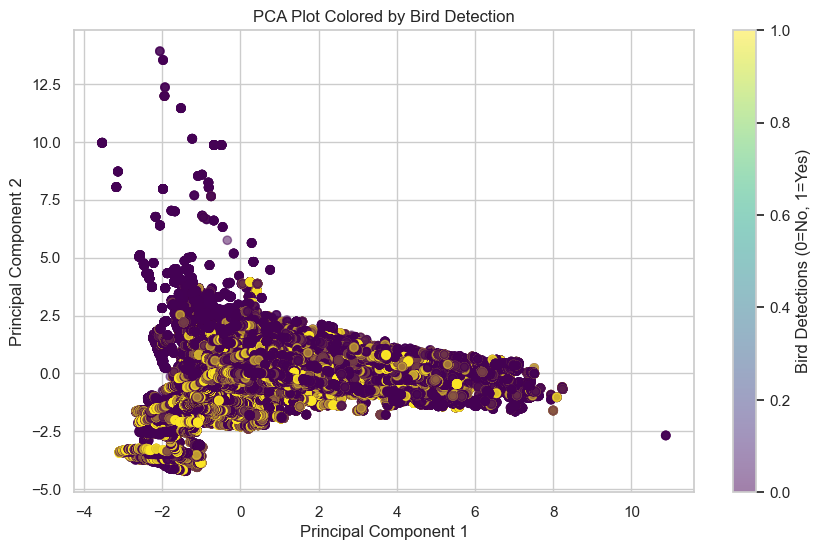

In [210]:
import matplotlib.pyplot as plt

# Assuming 'principalComponents' contains the PCA results and 'bird_detection' is your target variable.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=daytime_data['Bird_Detections'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Bird Detections (0=No, 1=Yes)')
plt.title('PCA Plot Colored by Bird Detection')
plt.show()


General Observations
Data Distribution:
The data points are primarily spread along Principal Component 1 (PC1), indicating that this component captures the most significant variation in the dataset. PC1 spans a wide range of values, suggesting it reflects a critical underlying factor or combination of factors influencing bird detection.
Principal Component 2 (PC2) also shows some variation but is much more constrained compared to PC1.
Detection Coloring:
The yellow points (indicating bird detections, value '1') are predominantly found concentrated towards the center of the PC1 axis and closer to zero on the PC2 axis.
The majority of the plot, particularly along the central horizontal alignment of PC1, shows a gradient transition from purple to yellow, indicating a mix of non-detections and detections.
Higher PC2 values, particularly in the region above 2.5, appear mostly purple, indicating non-detections.
Specific Insights
Clusters and Patterns:
There is a distinct cluster of non-detections at higher values of PC2 (above 5), which suggests that whatever variation PC2 is capturing, it correlates negatively with the likelihood of detecting birds when at extreme values.
Bird detections are somewhat scattered but are most concentrated around the middle range of PC1 with lower values of PC2.
Principal Component Analysis:
PC1: Since this component has the broadest spread and bird detections are mainly concentrated in its midrange, PC1 likely captures significant environmental or observational factors that are optimally aligned (neither too high nor too low) to increase the likelihood of detecting birds.
PC2: The variation captured by PC2 seems to be less directly related to bird detections but may represent conditions that, particularly at extreme values, reduce the likelihood of detection.

In [212]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Logistic regression to see how well PCs predict bird detection
model = LogisticRegression()
model.fit(principalComponents, daytime_data['Bird_Detections'])

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficients for PC1, PC2:", model.coef_)


Intercept: [-1.34297]
Coefficients for PC1, PC2: [[ 0.06697021 -0.27301278]]


## Model Output Interpretation

### Intercept (\(\beta_0\))
The model's intercept is \(-1.34297\). In logistic regression, the intercept represents the log-odds of detecting a bird when all the predictors (principal components in this case) are zero. Mathematically, this translates to a bird detection probability when PC1 and PC2 are at their mean values (since data was standardized before PCA), calculated as follows:

\[
P(y = 1) = \frac{1}{1 + e^{-(-1.34297)}} \approx 0.207
\]

This suggests that in the absence of any effects from the principal components (when PCs are at mean or zero standardized value), the probability of detecting a bird is about 20.7%.

### Coefficients for PC1 and PC2
- **PC1 (\(\beta_1\)) = 0.06697021**: This coefficient is positive, indicating that higher values of PC1 increase the log-odds of detecting a bird, albeit the impact is relatively small. This means as PC1 increases, so does the probability of detecting a bird, suggesting that whatever composite factor PC1 represents (possibly related to environmental conditions like temperature or solar exposure if those loaded heavily on PC1), it is slightly favorable to bird detection.
- **PC2 (\(\beta_2\)) = -0.27301278**: This coefficient is negative and larger in magnitude than the coefficient for PC1, indicating a stronger influence on the probability of detecting a bird. A negative coefficient means that as PC2 increases, the log-odds of detecting a bird decrease. This could suggest that the factors heavily contributing to PC2 might be conditions or observations that are less conducive to bird detection, or possibly even deterrents.

## Probability Calculation
The logistic regression model uses the following formula to calculate the probability \(P\) of a bird detection:

\[
P(y = 1 | x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \times \text{PC1} + \beta_2 \times \text{PC2})}}
\]

## Practical Application
Using these coefficients, you can:

- **Evaluate specific conditions** or perform scenario analysis by substituting different values for PC1 and PC2 to see how the probability of bird detection changes.
- **Apply the model to a new dataset** to predict bird detections.
- **Use these insights to adjust survey strategies** or conservation efforts if specific conditions represented by the principal components are under human control or influence.

This model offers a quantitative way to link complex, multivariate environmental data (reduced to principal components) with the likelihood of detecting birds, enhancing both understanding and decision-making in ecological studies or similar applications.


Explained variance ratio for PC1, PC2, and PC3: [0.47846207 0.22225887 0.12328235]
Total variance explained by the first three PCs: 0.824003284773887
Loadings:
                          PC1       PC2       PC3
precipRate         -0.170746  0.554904  0.790300
pressureMax         0.116086 -0.727429  0.150920
dewptAvg            0.680847  0.605202 -0.260069
tempAve             0.868825  0.371857 -0.193101
humidityAvg        -0.673724  0.406651 -0.068662
solarRadiationHigh  0.907563 -0.166200  0.223949
uvHigh              0.900351 -0.145642  0.236299


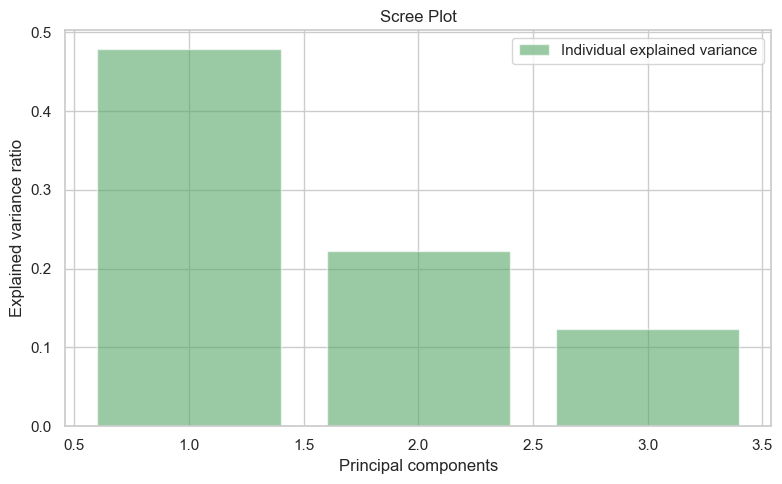

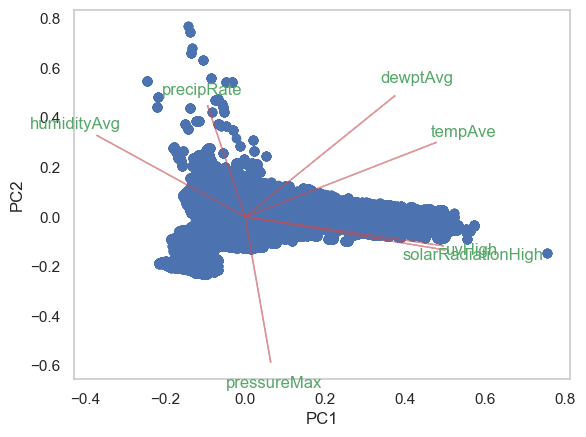

In [203]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample data
# Replace [...] with your actual data or ensure your DataFrame is defined here
data = daytime_data[['precipRate', 'pressureMax', 'dewptAvg', 'tempAve', 'humidityAvg','solarRadiationHigh','uvHigh']]
# Standardizing the data (important for PCA to perform correctly)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applying PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_scaled)

# Creating a DataFrame with the principal components
principal_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for PC1, PC2, and PC3:", explained_variance_ratio)
print("Total variance explained by the first three PCs:", sum(explained_variance_ratio))

# Loadings (or weights) of the original features for each principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=data.columns)
print("Loadings:\n", loadings_df)

# Optional: Plotting a Scree Plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, 4), explained_variance_ratio, alpha=0.6, color='g', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()  # This adjusts subplot params for the figure
plt.show()
# Optional: Biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='b')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the biplot function if needed
biplot(principalComponents[:, :2], np.transpose(pca.components_[0:2, :]), labels=data.columns)
plt.show()


Analysis of Directions and Correlations

tempAve and solarRadiationHigh: Both vectors point in a similar direction along the positive side of PC1, suggesting that these variables are positively correlated with each other and strongly influence PC1. This indicates that higher values of temperature and solar radiation are associated with higher scores in PC1.
humidityAvg, precipRate, and dewptAvg: These vectors primarily have a positive orientation along PC2, indicating that increases in these variables correspond to higher values in PC2. It suggests that these variables, which are related to moisture, define much of the variability in PC2.
pressureMax: This vector points towards the negative side of PC2, suggesting an inverse relationship with the variables associated with moisture, such as humidity and precipitation. This implies that higher pressure is correlated with lower scores in PC2, aligning with lower moisture conditions.
Interpreting the Data Points Distribution
The distribution of data points primarily along PC1 and slightly along PC2 suggests variability in the dataset along these dimensions. Observations further along the positive side of PC1 are likely associated with higher temperatures and solar radiation, while those along the positive side of PC2 may be associated with higher moisture conditions.
Conclusion
This biplot is valuable for visually assessing the relationships between variables and the principal components, as well as understanding the dataset's structure in a reduced-dimensional space. It helps in identifying patterns, correlations, and potential outliers, which can be crucial for further analysis and modeling efforts.

Explained Variance Ratio
PC1: 47.85% - This component explains nearly half of the variance in your data, indicating it captures a significant amount of the information.
PC2: 22.23% - The second component still contributes a considerable amount, though less than half compared to PC1.
PC3: 12.33% - This component adds to the explanation, contributing over a tenth of the total variance.
Total: 82.40% - Together, the first three components explain about 82.40% of the variance in your data, which suggests that they capture most of the critical information, though some details are still held in the remaining components.
Interpretation of Loadings
Principal Component 1 (PC1):

Dominated by tempAve, solarRadiationHigh, and uvHigh with high positive loadings, suggesting that this component is strongly associated with factors related to temperature and solar radiation. This might be interpreted as an overall "environmental energy" factor where both temperature and solar input are high.
humidityAvg has a strong negative loading, indicating that this component also captures an inverse relationship with humidity (as temperature and solar radiation increase, humidity decreases).
Principal Component 2 (PC2):

pressureMax shows a strong negative loading, and precipRate, dewptAvg, and humidityAvg show positive loadings. This component may represent an atmospheric moisture component, where high pressure correlates with low moisture and vice versa. High moisture levels, as indicated by precipitation, dew point, and humidity, are associated positively.
Principal Component 3 (PC3):

Dominated positively by precipRate and somewhat by solarRadiationHigh and uvHigh, suggesting a component that may relate to weather conditions conducive to precipitation and slightly influenced by solar factors.
dewptAvg, tempAve, and notably pressureMax show minor negative contributions, indicating a possible slight inverse relationship with these features during events of higher precipitation.
Summary
PC1 could be viewed as the "climatic energy" component, capturing variations primarily associated with temperature and radiation and inversely related to humidity.
PC2 might represent an "atmospheric moisture" component, emphasizing the balance between atmospheric pressure and moisture content.
PC3 seems to reflect specific conditions that favor precipitation, possibly during particular weather scenarios influenced by solar and UV conditions.
Each principal component captures different aspects of the climatic and atmospheric data, providing a multi-faceted insight into the dataset's variance structure. These insights can be particularly valuable in modeling climate-related phenomena or in understanding environmental data distributions.